In [1]:
%%HTML
<img src="home/nati/Pictures/otto_competition.JPG",width=10,height=10>

# Exploratory Data Analysis & classification tutorial:

The goals of this tutorial notebook are to:
a) introduce you to the process and approach for performing Exploratory Data Analysis (EDA) 
b) get you train various classifiers and explore their results
c) use these trained models to predict the target variable (in this example dataset it is the type of a product)

lets begin with importing some common libraries we discussed about in the previous part.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split

my_color_map = ['green','aqua','pink','blue','red','black','yellow','teal','orange','grey']

now lets load our data set for this tutorial:
the Otto dataset 

In [3]:
tr_data = pd.read_csv('../input/train.csv')
te_data = pd.read_csv('../input/test.csv')
print('train shape is: {} \r\n\ test shape is: {}'.format(tr_data.shape, te_data.shape))

train shape is: (61878, 95) 
\ test shape is: (144368, 94)


pandas has lots of great features that can help us get insights to the data with very little effort
lets begin with exploring some statistics of the numerical features:

In [4]:
tr_data.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


this format is somewhat problematic since:

1) when we scroll aside we notice that not all columns are presented so we cannot explore them

2) the data is very wide and we're not using the screen very efficiently

we can solve the first problem by setting some of pandas display parameters
as for the screen usage - we can transpose the resulting dataframe 

In [9]:
#set number of rows and columns to see 
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50



#use transposed view of the features
desc = tr_data.describe().T
desc['count_nonzero'] = np.count_nonzero(tr_data,axis=0)[:-1]
desc['num_uniques'] = [len(tr_data[x].unique()) for x in tr_data.columns[:-1]]
desc['uniques'] = [(tr_data[x].unique()) for x in tr_data.columns[:-1]]
desc

,count,mean,std,min,25%,50%,75%,max,count_nonzero,num_uniques,uniques
id,61878.0,30939.500000,17862.784315,1.0,15470.25,30939.5,46408.75,61878.0,61878,61878,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
feat_1,61878.0,0.386680,1.525330,0.0,0.00,0.0,0.00,61.0,10395,42,"[1, 0, 2, 3, 5, 8, 4, 7, 6, 25, 9, 23, 22, 15,..."
feat_2,61878.0,0.263066,1.252073,0.0,0.00,0.0,0.00,51.0,6860,37,"[0, 1, 2, 10, 3, 4, 5, 7, 6, 9, 8, 12, 11, 15,..."
feat_3,61878.0,0.901467,2.934818,0.0,0.00,0.0,0.00,64.0,12583,48,"[0, 1, 2, 7, 4, 3, 5, 6, 27, 16, 10, 20, 15, 1..."
feat_4,61878.0,0.779081,2.788005,0.0,0.00,0.0,0.00,70.0,13430,59,"[0, 1, 2, 3, 4, 5, 7, 6, 9, 8, 17, 11, 13, 10,..."
feat_5,61878.0,0.071043,0.438902,0.0,0.00,0.0,0.00,19.0,2971,15,"[0, 6, 7, 1, 3, 10, 2, 9, 5, 4, 8, 12, 19, 11,..."
feat_6,61878.0,0.025696,0.215333,0.0,0.00,0.0,0.00,10.0,1168,9,"[0, 1, 2, 5, 4, 3, 10, 6, 8]"
feat_7,61878.0,0.193704,1.030102,0.0,0.00,0.0,0.00,38.0,5435,30,"[0, 5, 1, 2, 4, 3, 6, 7, 18, 10, 19, 8, 9, 16,..."
feat_8,61878.0,0.662433,2.255770,0.0,0.00,0.0,1.00,76.0,16566,55,"[0, 1, 2, 4, 3, 7, 5, 13, 6, 14, 38, 9, 32, 21..."
feat_9,61878.0,1.011296,3.474822,0.0,0.00,0.0,0.00,43.0,12042,40,"[0, 1, 2, 5, 6, 4, 3, 7, 29, 12, 18, 13, 37, 1..."


another great feature of the pandas package is the simplisity 
of exploring the values distribution of the target variable & for each of the feature 

the value counts of the target are:
Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64
Axes(0.125,0.125;0.775x0.755)


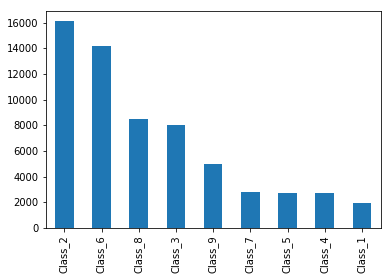

In [11]:
print('the value counts of the target are:')
print(tr_data.iloc[:,-1].value_counts())
print(tr_data.iloc[:,-1].value_counts().plot(kind = 'bar'))

In [ ]:
for i,feat in enumerate(tr_data.columns[1:-1]): #we start from the second feature as the first one is the item id
    print('the value counts of feature {} are:'.format(feat))
    print(tr_data[feat].value_counts())

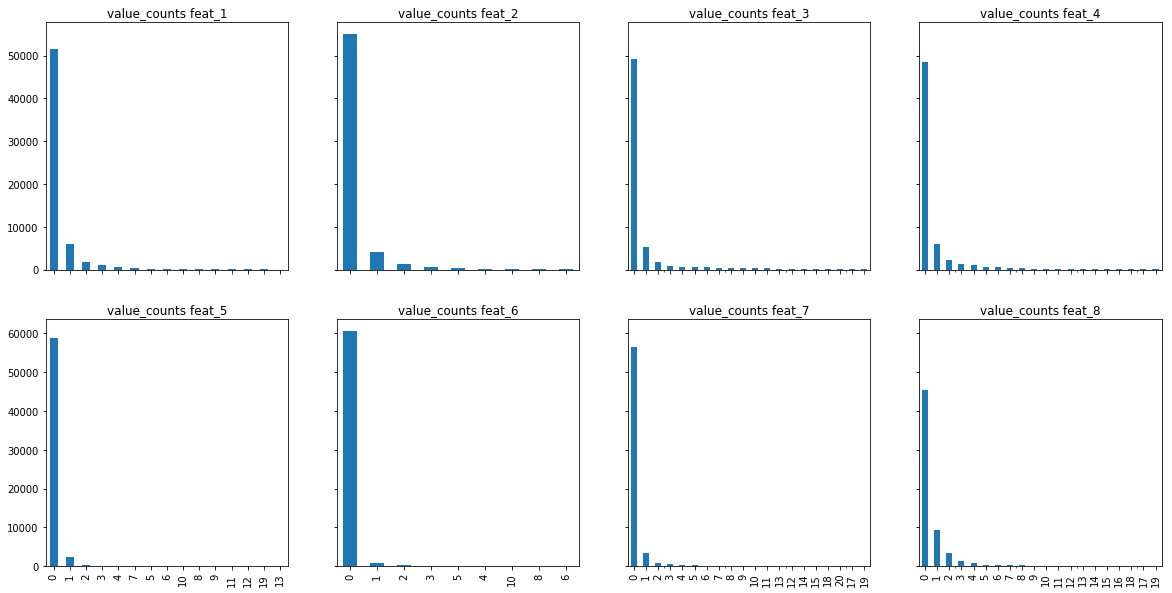

In [14]:
def value_counts_plots(dat,rows = 4, cols = 4):
    _,ax = plt.subplots(rows,cols,sharey='row',sharex='col',figsize = (cols*5,rows*5))
    for i,feat in enumerate(dat.columns[:(rows*cols)]):
        dat[feat].value_counts().iloc[:20].plot(kind = 'bar',ax=ax[int(i/cols), int(i%cols)],title='value_counts {}'.format(feat))

value_counts_plots(tr_data.iloc[:,1:9],2,4)

In [18]:
tr_data['parsed_target'] = [int(x.split('_')[1]) for x in tr_data.target]
tr_data.drop('target',axis=1,inplace=True)

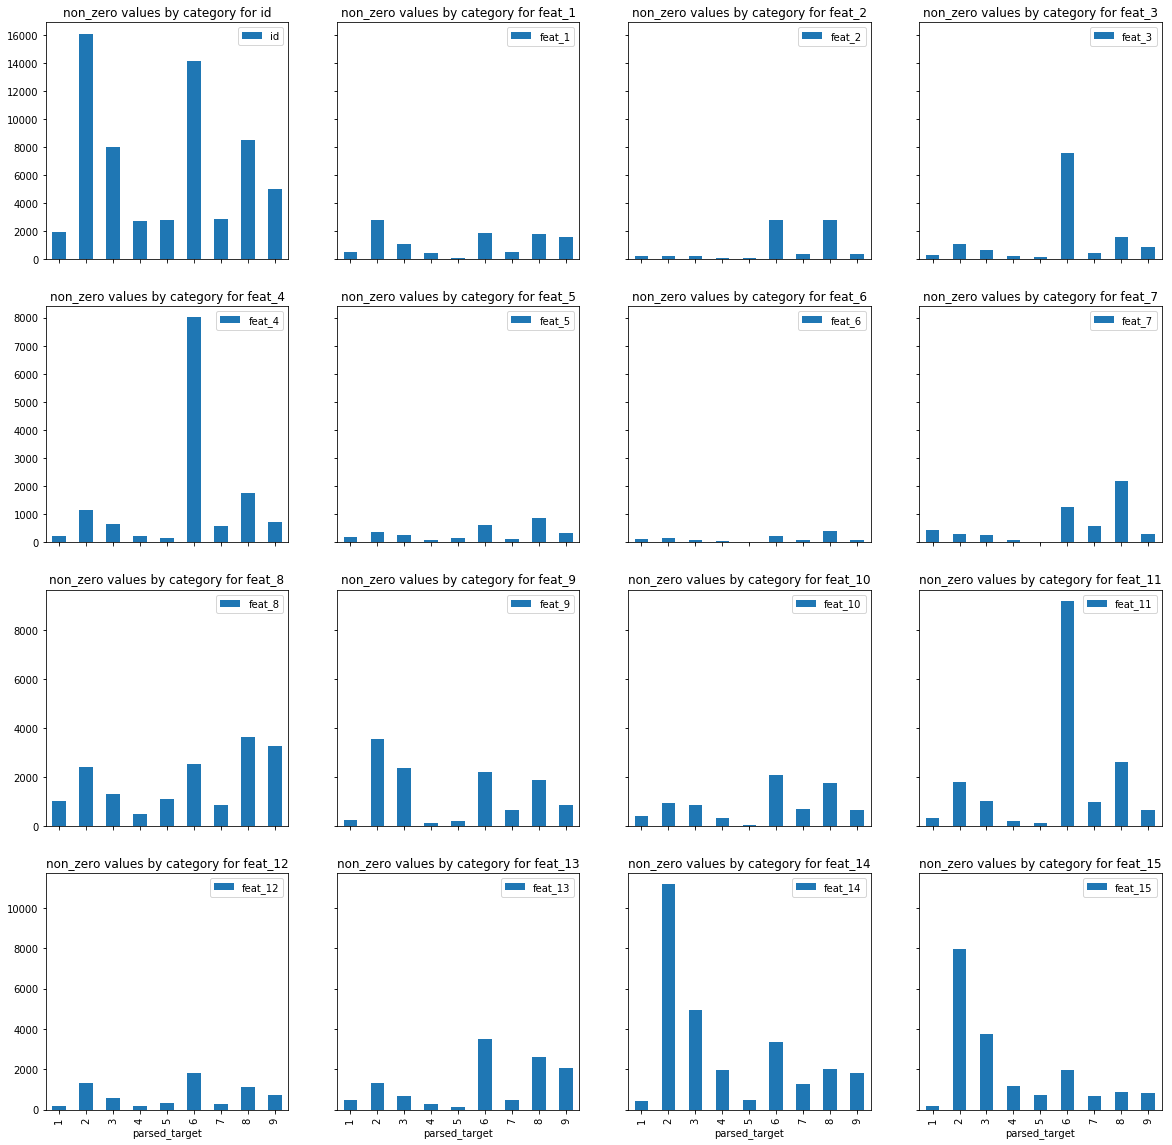

In [22]:
def target_bar_plots(dat,cols = 4, rows = 4):
    _,ax = plt.subplots(rows,cols,sharey='row',sharex='col',figsize = (cols*5,rows*5))
    for i,feat in enumerate(dat.columns[:(rows*cols)]):
        try:
            dat.pivot_table(index=['parsed_target'],values=dat.columns[i],aggfunc=np.count_nonzero).plot(
                kind = 'bar' ,ax=ax[int(i/cols), int(i%cols)],title = 
                'non_zero values by category for {}'.format(feat))
        except: 
            pass

target_bar_plots(tr_data,4,4)

while examining these plots we can already make some assumptions 

as to which categories will be easier to predict and which will be the harder ones - can you guess? 

now lets look at the test set features and check if they resemble the train features

In [23]:
tr_data['source'] = 'train'
te_data['source'] = 'test'
all_data = pd.concat([tr_data,te_data],axis=0)
tr_data.drop('source',axis=1,inplace=True)
te_data.drop('source',axis=1,inplace=True)

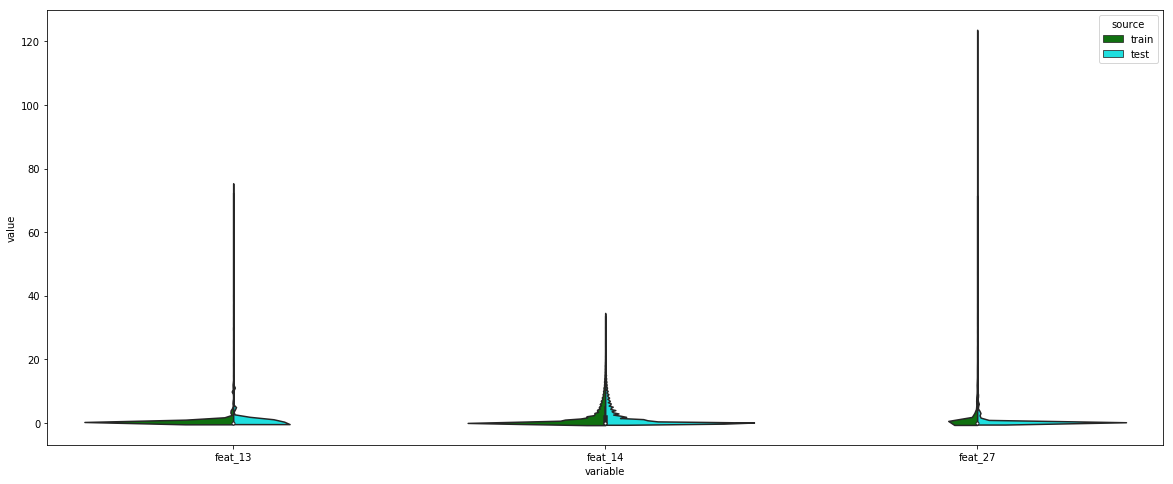

In [37]:
molten = pd.melt(all_data, id_vars = 'source',value_vars = ['feat_'+str(x) for x in [13,14,27]])
plt.subplots(figsize = (20,8))
sns.violinplot(data=molten, x= 'variable',y='value',hue='source',split = True,palette=my_color_map)

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tr_data.iloc[:,1:-1],tr_data.parsed_target,test_size = 0.2,random_state =2017)

9

[[ 239   14    3    1    5   26   10   35   70]
 [   3 2738  400   54    8    5   19    5    2]
 [   2  870  665   54    2    4   18    4    3]
 [   3  230  109  159    9   13    6    1    0]
 [   2   15    0    0  490    0    0    1    0]
 [  39   24    8    5    4 2626   26   36   28]
 [  28   75   58   11    4   44  297   29    4]
 [  64   21   10    1    1   62   14 1526   23]
 [  65   26    1    2    3   36    7   27  844]]
log loss: 0.8098666950500315
CPU times: user 240 ms, sys: 0 ns, total: 240 ms
Wall time: 247 ms


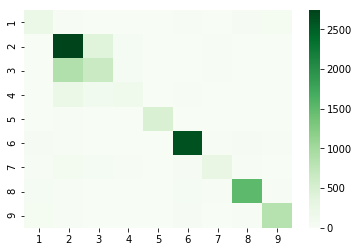

In [49]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
knn = KNeighborsClassifier(n_jobs=4,n_neighbors=4)
knn.fit(X_train,y_train)
knn4_pred = knn.predict(X_val)
knn4_pred_proba = knn.predict_proba(X_val)
print(confusion_matrix(y_pred=knn4_pred,y_true=y_val))
print('log loss: {}'.format(log_loss(y_pred=np.clip(knn4_pred_proba,a_max=0.999,a_min=0.001),y_true=pd.get_dummies(y_val-1))))
sns.heatmap(xticklabels=range(1,10),yticklabels=range(1,10),data = confusion_matrix(y_pred=knn4_pred,y_true=y_val),cmap='Greens')

In [50]:
from sklearn.metrics import classification_report
print('classification report results:\r\n' + classification_report(y_pred=knn4_pred,y_true=y_val))

classification report results:
             precision    recall  f1-score   support

          1       0.54      0.59      0.56       403
          2       0.68      0.85      0.76      3234
          3       0.53      0.41      0.46      1622
          4       0.55      0.30      0.39       530
          5       0.93      0.96      0.95       508
          6       0.93      0.94      0.94      2796
          7       0.75      0.54      0.63       550
          8       0.92      0.89      0.90      1722
          9       0.87      0.83      0.85      1011

avg / total       0.77      0.77      0.77     12376



as we can see our assamption was indeed correct - categories 6,8 and 2 are those easiest to predict

[[  31   37    3    0    0   34   15  153  130]
 [   2 2666  321   36    3   16   26  134   30]
 [   1  984  512   17    0   11   23   53   21]
 [   0  296   49  128    3   24    3   17   10]
 [   1   12    1    1  459    1    0   32    1]
 [   7   67    4   13    2 2481   35  125   62]
 [   2  143   30    2    0   54  189   99   31]
 [  20   92   12    5    2   55   38 1413   85]
 [  24   77    5    5    2   40   15  157  686]]
log loss: 0.9946286807843709
classification report results:
             precision    recall  f1-score   support

          1       0.35      0.08      0.13       403
          2       0.61      0.82      0.70      3234
          3       0.55      0.32      0.40      1622
          4       0.62      0.24      0.35       530
          5       0.97      0.90      0.94       508
          6       0.91      0.89      0.90      2796
          7       0.55      0.34      0.42       550
          8       0.65      0.82      0.72      1722
          9       0.65      0

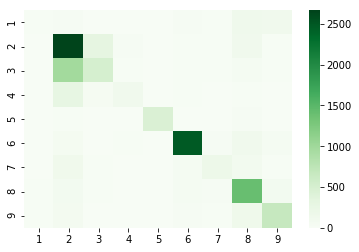

In [60]:
%%time

#this will give higher importance to successfully classifying the 4th class items
class_weights = {1:8,2:1,3:2,4:5,5:5,6:1,7:5,8:2,9:3}

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(#class_weight=class_weights,
                             max_depth=15,max_features=92,min_samples_split=2,random_state=12345)
dtc.fit(X_train,y_train)
tree_pred = dtc.predict(X_val)
tree_pred_proba = dtc.predict_proba(X_val)
print(confusion_matrix(y_pred=tree_pred,y_true=y_val))
print('log loss: {}'.format(log_loss(y_pred=np.clip(tree_pred_proba,a_max=0.999,a_min=0.001),y_true=pd.get_dummies(y_val-1))))
sns.heatmap(confusion_matrix(y_pred=tree_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),yticklabels=range(1,10))
print('classification report results:\r\n' + classification_report(y_pred=tree_pred,y_true=y_val))

lets see if support vector machines will do any better

/home/nati/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[[  47    2    1    6    5   16   12  143  171]
 [   2  238  504  903  364   41  388  674  120]
 [   3  121  249  408  180   24  271  348   18]
 [   1   42   65  211   25    5   88   85    8]
 [   0    0    2    1  493    0    1    7    4]
 [ 221   16    9  285    1 1140  100  842  182]
 [  18    9   47   70    1   49  168  150   38]
 [ 282   28    3   29    6  130  223  904  117]
 [ 177    1    3    6    1   18    6  158  641]]
classification report results:
             precision    recall  f1-score   support

          1       0.06      0.12      0.08       403
          2       0.52      0.07      0.13      3234
          3       0.28      0.15      0.20      1622
          4       0.11      0.40      0.17       530
          5       0.46      0.97      0.62       508
          6       0.80      0.41      0.54      2796
          7       0.13      0.31      0.19       550
          8       0.27      0.52      0.36      1722
          9       0.49      0.63      0.55      1011

avg 

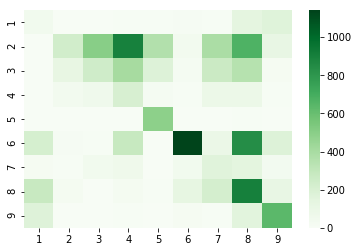

In [61]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=0.1,max_iter=100,random_state=12345)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_val)
print(confusion_matrix(y_pred=svc_pred,y_true=y_val))
sns.heatmap(confusion_matrix(y_pred=svc_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),
            yticklabels=range(1,10))
print('classification report results:\r\n' + classification_report(y_pred=svc_pred,y_true=y_val))

[[  12   35    0    0    0   28    3  210  115]
 [   0 3133   47    0   22    5    3   18    6]
 [   0 1458  126    0    8    3    8   16    3]
 [   0  472   16    8    5   21    6    2    0]
 [   0   63    0    0  435    0    0   10    0]
 [   2   67    1    1    0 2574   14  103   34]
 [   1  208   14    0    0   58  131  135    3]
 [   4   48    0    0    1   42    1 1604   22]
 [   1   79    0    0    0   32    1  130  768]]
classification report results:
             precision    recall  f1-score   support

          1       0.60      0.03      0.06       403
          2       0.56      0.97      0.71      3234
          3       0.62      0.08      0.14      1622
          4       0.89      0.02      0.03       530
          5       0.92      0.86      0.89       508
          6       0.93      0.92      0.93      2796
          7       0.78      0.24      0.37       550
          8       0.72      0.93      0.81      1722
          9       0.81      0.76      0.78      1011

avg 

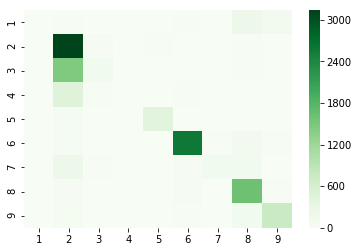

In [62]:
#this cell takes some time to run its not relevant for the rest of the notebook

from sklearn.preprocessing import MinMaxScaler
svc = SVC(kernel='linear',C=0.1,max_iter=10000,random_state=12345)
mms = MinMaxScaler()
mms.fit(X_train)
X_train_scaled = mms.transform(X_train)
X_val_scaled = mms.transform(X_val)
svc.fit(X_train_scaled,y_train)
svc_pred = svc.predict(X_val_scaled)
print(confusion_matrix(y_pred=svc_pred,y_true=y_val))
sns.heatmap(confusion_matrix(y_pred=svc_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),
            yticklabels=range(1,10))
print('classification report results:\r\n' + classification_report(y_pred=svc_pred,y_true=y_val))

we can see that we get less accurate results on the whole, 

but we achieved better results for the class we selected to be more important 

lets try ensamble learning - we'll start with random forest

[[ 154   13    2    0    2   36   15   77  104]
 [   0 2844  338   18    3    4   21    4    2]
 [   0  772  818    9    0    1   15    5    2]
 [   1  206   73  217    5   22    6    0    0]
 [   0   11    1    0  495    0    0    0    1]
 [   7   29    4    2    1 2669   29   29   26]
 [   5   74   47    4    0   65  303   45    7]
 [  11   20    3    0    1   51    7 1615   14]
 [  15   21    2    0    2   34    7   35  895]]
log loss: 0.5815486054294937
classification report results:
             precision    recall  f1-score   support

          1       0.80      0.38      0.52       403
          2       0.71      0.88      0.79      3234
          3       0.64      0.50      0.56      1622
          4       0.87      0.41      0.56       530
          5       0.97      0.97      0.97       508
          6       0.93      0.95      0.94      2796
          7       0.75      0.55      0.64       550
          8       0.89      0.94      0.91      1722
          9       0.85      0

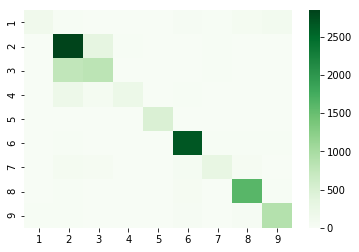

In [64]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=4,n_estimators=100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_val)
rfc_pred_proba = rfc.predict_proba(X_val)
print(confusion_matrix(y_pred=rfc_pred,y_true=y_val))
print('log loss: {}'.format(log_loss(y_pred=np.clip(rfc_pred_proba,a_max=0.999,a_min=0.001),y_true=pd.get_dummies(y_val-1))))
sns.heatmap(confusion_matrix(y_pred=rfc_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),yticklabels=range(1,10))
print('classification report results:\r\n' + classification_report(y_pred=rfc_pred,y_true=y_val))

yes!

rf model got highest score so far with no special effort just applying fit - predict

this is logical considering the overfitting we experienced earlier with decission tree classifier

let's check if gradient boosting can further improve on that

*note that in order to make sure each single model is under fitted we limit the depth of the tree to 6

[[ 196   12    4    1    1   33   22   51   83]
 [   1 2752  396   38    4    6   28    6    3]
 [   0  700  844   36    0    4   33    5    0]
 [   0  173   86  238    3   18   10    2    0]
 [   0   11    0    0  495    0    0    1    1]
 [  15   27    2    4    1 2644   37   34   32]
 [  12   50   46    3    2   60  342   28    7]
 [  21   18    3    0    2   48   20 1592   18]
 [  35   22    0    0    0   31    7   30  886]]
log loss: 0.5237831258983502
classification report results:
             precision    recall  f1-score   support

          1       0.70      0.49      0.57       403
          2       0.73      0.85      0.79      3234
          3       0.61      0.52      0.56      1622
          4       0.74      0.45      0.56       530
          5       0.97      0.97      0.97       508
          6       0.93      0.95      0.94      2796
          7       0.69      0.62      0.65       550
          8       0.91      0.92      0.92      1722
          9       0.86      0

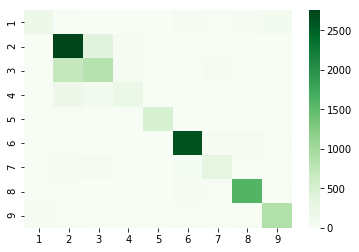

In [68]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100,max_depth=6)
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_val)
gbc_pred_proba = gbc.predict_proba(X_val)
print(confusion_matrix(y_pred=gbc_pred,y_true=y_val))
print('log loss: {}'.format(log_loss(y_pred=np.clip(gbc_pred_proba,a_max=0.999,a_min=0.001),y_true=pd.get_dummies(y_val-1))))
sns.heatmap(confusion_matrix(y_pred=gbc_pred,y_true=y_val),cmap='Greens',xticklabels=range(1,10),yticklabels=range(1,10))
print('classification report results:\r\n' + classification_report(y_pred=gbc_pred,y_true=y_val))

In [70]:
%%time
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train,label=y_train-1) #xgb classes starts from zero
dval = xgb.DMatrix(data=X_val,label=y_val-1) #xgb classes starts from zero
watchlist = [ (dtrain,'train'),(dval,'eval'),]

xgb_params = {
    'eta': 0.05,
    'max_depth': 7,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'colsample_bylevel': 0.7,
    'lambda':0.1,
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    'min_child_weight':2,
    'num_class' : 9
}

bst = xgb.train(params=xgb_params,dtrain=dtrain,num_boost_round=400,evals=watchlist,verbose_eval=10)

[0]	train-mlogloss:2.07413	eval-mlogloss:2.07817
[10]	train-mlogloss:1.41186	eval-mlogloss:1.4356
[20]	train-mlogloss:1.09568	eval-mlogloss:1.13296
[30]	train-mlogloss:0.907158	eval-mlogloss:0.955491
[40]	train-mlogloss:0.78292	eval-mlogloss:0.840293
[50]	train-mlogloss:0.69603	eval-mlogloss:0.762052
[60]	train-mlogloss:0.633958	eval-mlogloss:0.707261
[70]	train-mlogloss:0.587178	eval-mlogloss:0.667089
[80]	train-mlogloss:0.551396	eval-mlogloss:0.637647
[90]	train-mlogloss:0.522386	eval-mlogloss:0.614704
[100]	train-mlogloss:0.49909	eval-mlogloss:0.596758
[110]	train-mlogloss:0.480726	eval-mlogloss:0.582965
[120]	train-mlogloss:0.464709	eval-mlogloss:0.571286
[130]	train-mlogloss:0.450729	eval-mlogloss:0.561303
[140]	train-mlogloss:0.438407	eval-mlogloss:0.553111
[150]	train-mlogloss:0.428188	eval-mlogloss:0.546255
[160]	train-mlogloss:0.418501	eval-mlogloss:0.539936
[170]	train-mlogloss:0.409217	eval-mlogloss:0.534293
[180]	train-mlogloss:0.400752	eval-mlogloss:0.52962
[190]	train-mlo

In [71]:
xgb_pred = bst.predict(dval)

xgb_params = {
    'eta': 0.05,
    'max_depth': 7,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'colsample_bylevel': 0.7,
    'lambda':0.1,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'min_child_weight':2,
    'num_class' : 9
}

bst = xgb.train(params=xgb_params,dtrain=dtrain,num_boost_round=400,evals=watchlist,verbose_eval=10)

[0]	train-mlogloss:2.07413	eval-mlogloss:2.07817
[10]	train-mlogloss:1.41186	eval-mlogloss:1.4356
[20]	train-mlogloss:1.09568	eval-mlogloss:1.13296
[30]	train-mlogloss:0.907158	eval-mlogloss:0.955491
[40]	train-mlogloss:0.78292	eval-mlogloss:0.840293
[50]	train-mlogloss:0.69603	eval-mlogloss:0.762052
[60]	train-mlogloss:0.633958	eval-mlogloss:0.707261
[70]	train-mlogloss:0.587178	eval-mlogloss:0.667089
[80]	train-mlogloss:0.551396	eval-mlogloss:0.637647
[90]	train-mlogloss:0.522386	eval-mlogloss:0.614704
[100]	train-mlogloss:0.49909	eval-mlogloss:0.596758
[110]	train-mlogloss:0.480726	eval-mlogloss:0.582965
[120]	train-mlogloss:0.464709	eval-mlogloss:0.571286
[130]	train-mlogloss:0.450729	eval-mlogloss:0.561303
[140]	train-mlogloss:0.438407	eval-mlogloss:0.553111
[150]	train-mlogloss:0.428188	eval-mlogloss:0.546255
[160]	train-mlogloss:0.418501	eval-mlogloss:0.539936
[170]	train-mlogloss:0.409217	eval-mlogloss:0.534293
[180]	train-mlogloss:0.400752	eval-mlogloss:0.52962
[190]	train-mlo

[[   0    0    0    0    0    0    0    0    0    0]
 [ 204   14    3    0    1   30   17   49   85    0]
 [   1 2781  372   35    4    7   27    4    3    0]
 [   1  720  827   27    0    3   34    4    6    0]
 [   1  175   81  244    4   19    5    1    0    0]
 [   0    6    1    0  500    0    0    0    1    0]
 [  13   22    3    2    1 2663   33   27   32    0]
 [  10   52   43    4    2   48  360   26    5    0]
 [  19   18    3    0    2   45   18 1599   18    0]
 [  30   15    0    0    0   28    8   31  899    0]]
log loss: 0.4863382295577299
classification report results:
             precision    recall  f1-score   support

          1       0.73      0.51      0.60       403
          2       0.73      0.86      0.79      3234
          3       0.62      0.51      0.56      1622
          4       0.78      0.46      0.58       530
          5       0.97      0.98      0.98       508
          6       0.94      0.95      0.94      2796
          7       0.72      0.65     

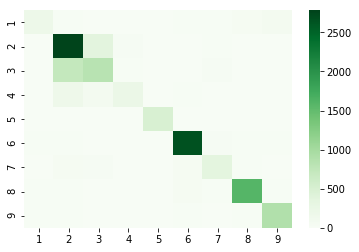

In [72]:
xgb_pred_proba = bst.predict(dval)
print(confusion_matrix(y_pred=xgb_pred,y_true=y_val))
print('log loss: {}'.format(log_loss(y_pred=np.clip(xgb_pred_proba,a_max=0.999,a_min=0.001),y_true=pd.get_dummies(y_val-1))))
sns.heatmap(confusion_matrix(y_pred=xgb_pred+1,y_true=y_val),cmap='Greens',xticklabels=range(1,10),yticklabels=range(1,10))
print('classification report results:\r\n' + classification_report(y_pred=xgb_pred+1,y_true=y_val))

wow! we got an average F1 score of 82% this looks great!

lets predict the results on the test set using the gradient boosting model and create a submission  to the kaggle platform

In [ ]:
test_pred = bst.predict(xgb.DMatrix(te_data.iloc[:,1:]))


In [ ]:
subm = pd.DataFrame(test_pred)
subm.columns = ['class_'+ str(x) for x in range(1,10)]
subm.index = te_data.id
subm.to_csv('../subm/xgboost_classification_submission.csv')

In [ ]:
#lets make sure our prediction fits the desired format:
print(subm.head())
print('submission shape: {}'.format(subm.shape))
print('')
print("great! we're good to go on and submit our results")

# home assignment:
* go over the things we learned
* write down terms which are not clear to you - and try to find your answers online
* try to write the code yourself rather than just pressing ctrl+enter
* improve the initial results that we got on class 
    - you can use the kaggle forums to check what other participants have done through the competition
    - think how can we further extract value from the plots we have made
    - you can try and improve one or more of the parameters that we learned about
    - try and combine more than one model (average/weighted average etc.) 
* select a dataset that interests you and create 2-3 plots that show something interesting about it